# Google Play Store Analysis

In [2]:
# Imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
googlestore_df =  pd.read_csv('google playstore.csv')

In [4]:
googlestore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
googlestore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# DATA CLEANING

In [6]:
def printinfo():
    temp = pd.DataFrame(index=googlestore_df.columns)
    temp['data_type'] = googlestore_df.dtypes
    temp['null_count'] = googlestore_df.isnull().sum()
    temp['unique_count'] = googlestore_df.nunique()
    return temp

In [7]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,21
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [8]:
googlestore_df[googlestore_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10,Strategy,"June 28, 2018",Varies with device,Varies with device


In [9]:
googlestore_df['Type'].fillna("Free", inplace = True)

In [10]:
googlestore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
#RATING SHOWING ABOVE 5
googlestore_df[googlestore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
googlestore_df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,50000,Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,500000,Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,10000,Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,100000,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,10000000,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,1000,Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,50000,Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,50000,Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,10000,Free,0,Everyone,Personalization,"September 27, 2017",4,4.0 and up


In [13]:
#row 10472 has missing data for the Category column
googlestore_df.dropna(subset = ['Content Rating'], inplace=True)

In [14]:
googlestore_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [15]:
modeValueRating = googlestore_df['Rating'].mode()

In [16]:
googlestore_df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [17]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,20
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [18]:
#CONVERTING THE REVIEW COLUMN INTO int TYPE
googlestore_df['Reviews'] = googlestore_df.Reviews.astype(int)

In [19]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,object,0,461
Installs,object,0,20
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [20]:
#Removing the +Symbol
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

In [21]:
#Removing the , symbol
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

In [22]:
#Replacing the M symbol by multiplying the value with 1000000:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

In [23]:
#googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

In [24]:
#Replacing the Varies with device value with Nan :
googlestore_df['Size'] = googlestore_df.Size.replace('Varies with device', np.NaN)

In [25]:
# converting all these values to numeric type
googlestore_df['Size'] = pd.to_numeric(googlestore_df['Size']) # Converting the string to Numeric type

In [26]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1695,459
Installs,object,0,20
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


# CLEANING INSTALLS 

In [27]:
googlestore_df.dropna(subset = ['Size'], inplace=True)

In [28]:
# remove the + symbol from values.
googlestore_df['Installs'] = googlestore_df.Installs.apply(lambda x: x.strip('+'))

In [29]:
#remove the , symbol from the numbers.
googlestore_df['Installs'] = googlestore_df.Installs.apply(lambda x: x.replace(',', ''))

In [30]:
#convert it from string type to numeric type.
googlestore_df['Installs'] = pd.to_numeric(googlestore_df['Installs'])

In [31]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


# CLEANING PRICE COLUMN

In [32]:
googlestore_df['Price'].value_counts()

0         8421
0.99       145
2.99       114
1.99        66
4.99        65
          ... 
389.99       1
19.9         1
1.75         1
14           1
1.04         1
Name: Price, Length: 87, dtype: int64

In [33]:
# Removing  special symbol $.
googlestore_df['Price'] = googlestore_df.Price.apply(lambda x: x.strip('$'))

In [34]:
googlestore_df['Price'] = pd.to_numeric(googlestore_df['Price'])

In [35]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


# EXPLORATORY ANALYSIS AND VISUALIZATION

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#Top categories in the play store, which contains the highest number of apps

In [37]:
y = googlestore_df['Category'].value_counts().index
x = googlestore_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

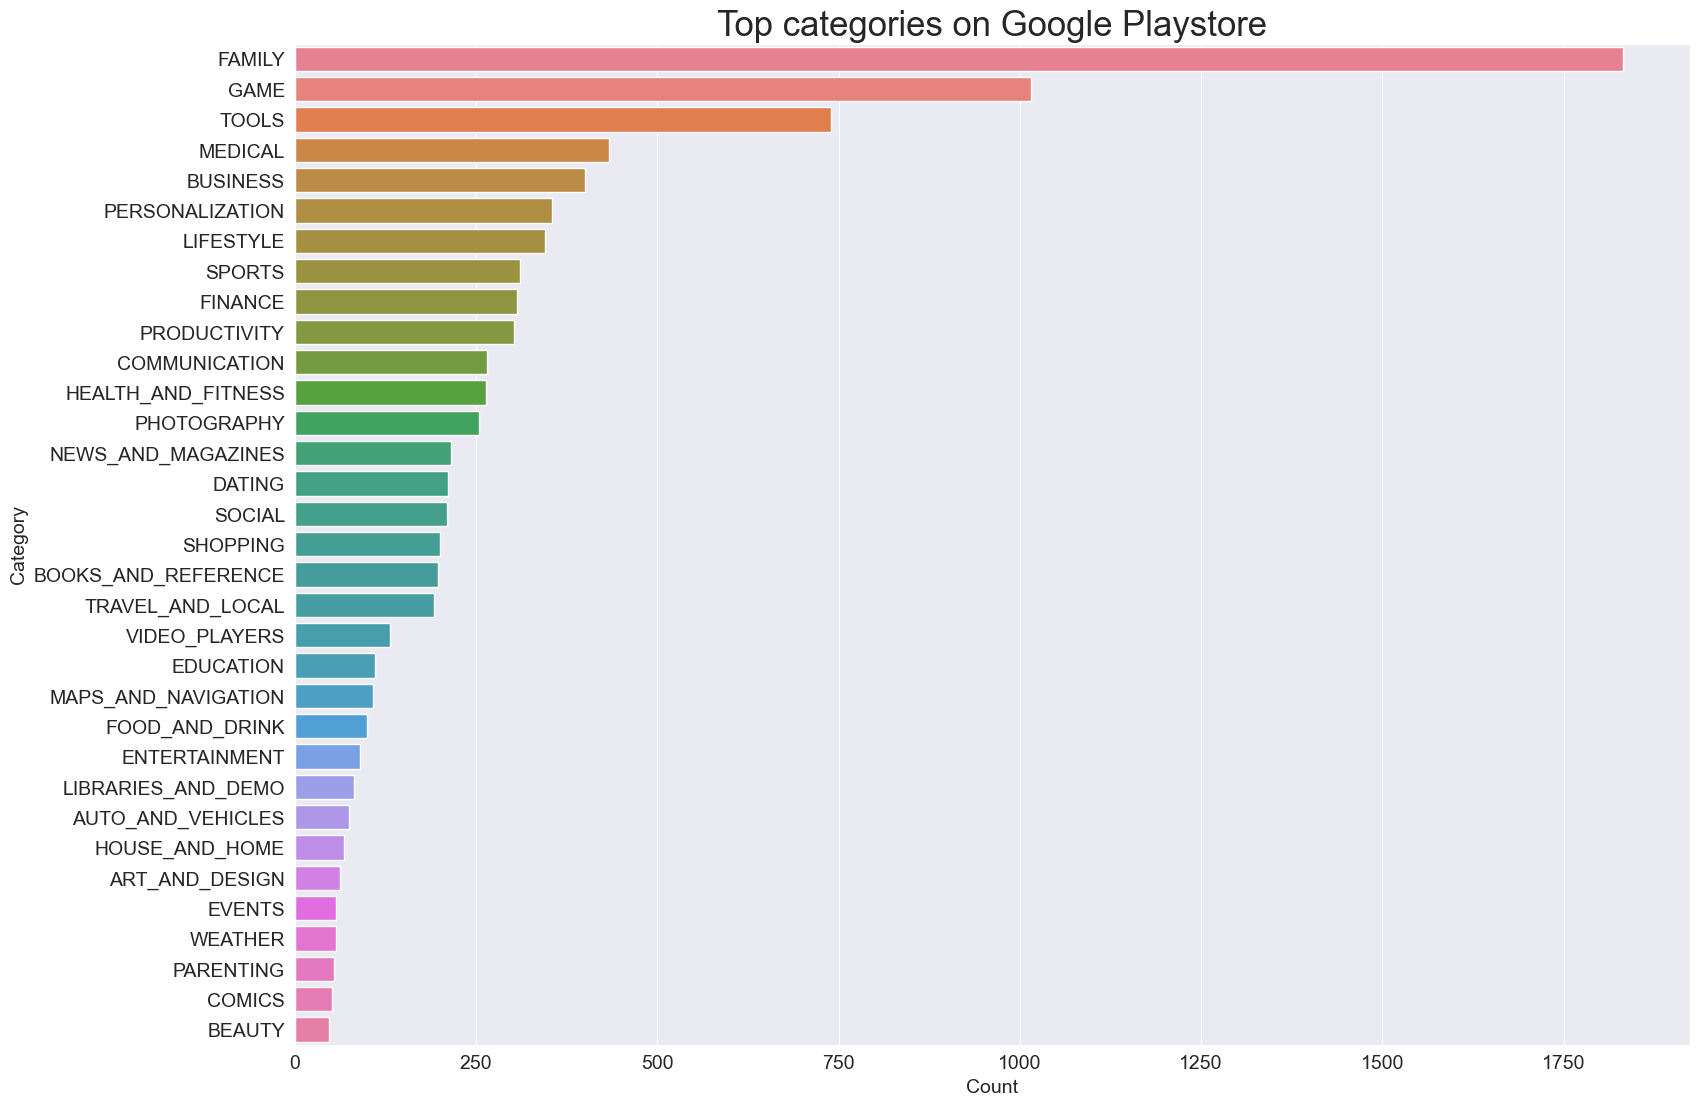

In [38]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

In [ ]:
#category of Apps from the ‘Content Rating’ column is found more on the play store

In [39]:
x2 = googlestore_df['Content Rating'].value_counts().index
y2 = googlestore_df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

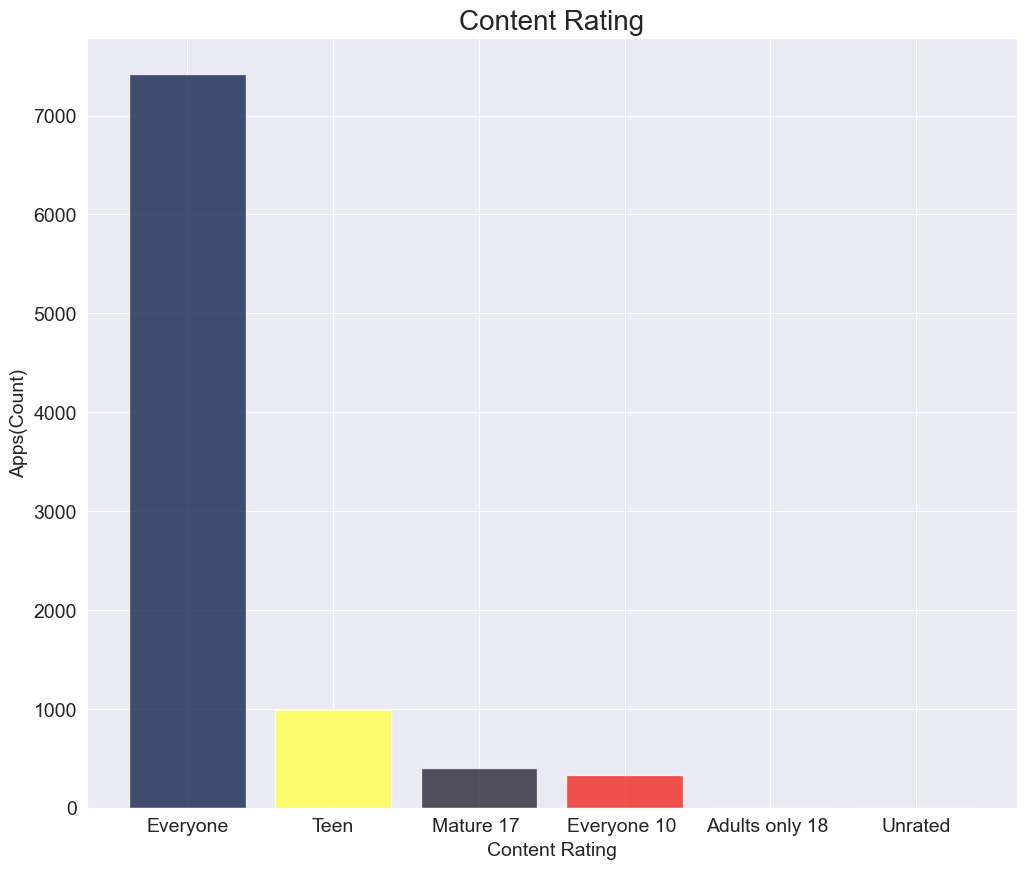

In [40]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

In [ ]:
# Distribution of the ratings of the data frame.

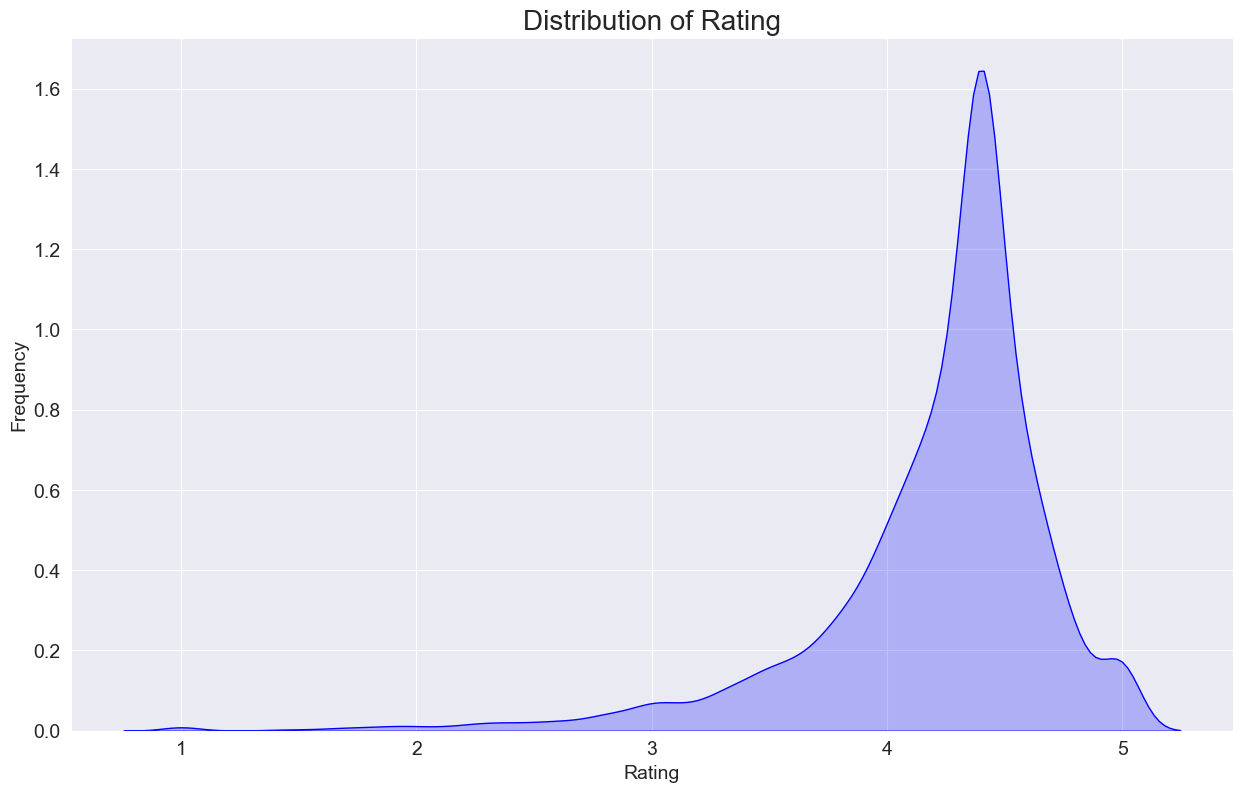

In [41]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(googlestore_df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

In [ ]:
# Paid and Free apps on playstore

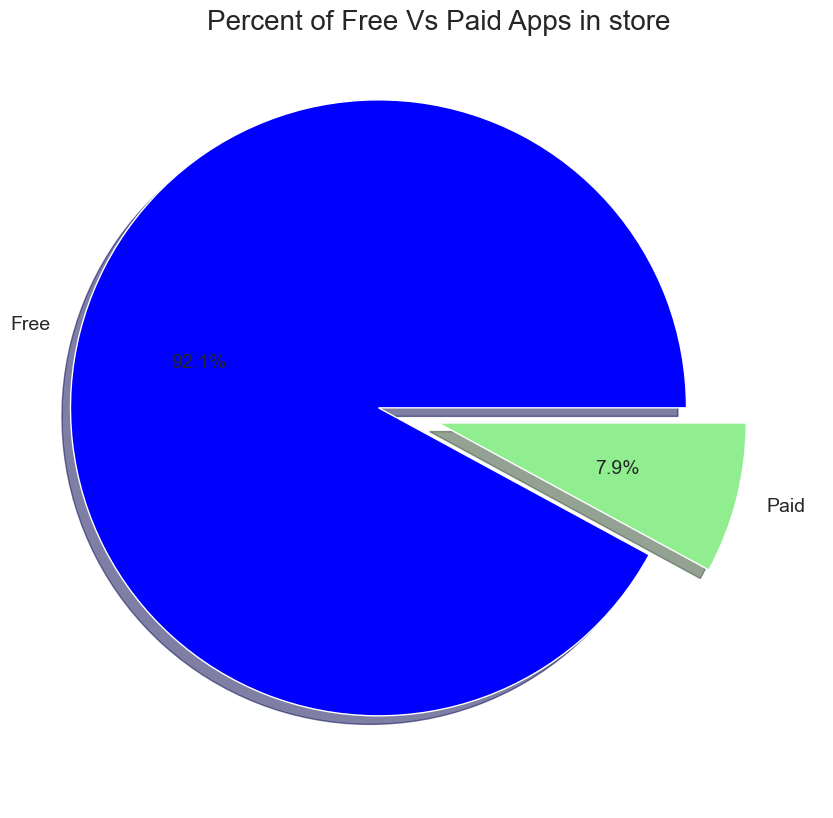

In [42]:
plt.figure(figsize=(10,10))
labels = googlestore_df['Type'].value_counts(sort = True).index
sizes = googlestore_df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()


In [ ]:
#Apps having the most number of installs

In [43]:
highest_Installs_df = googlestore_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

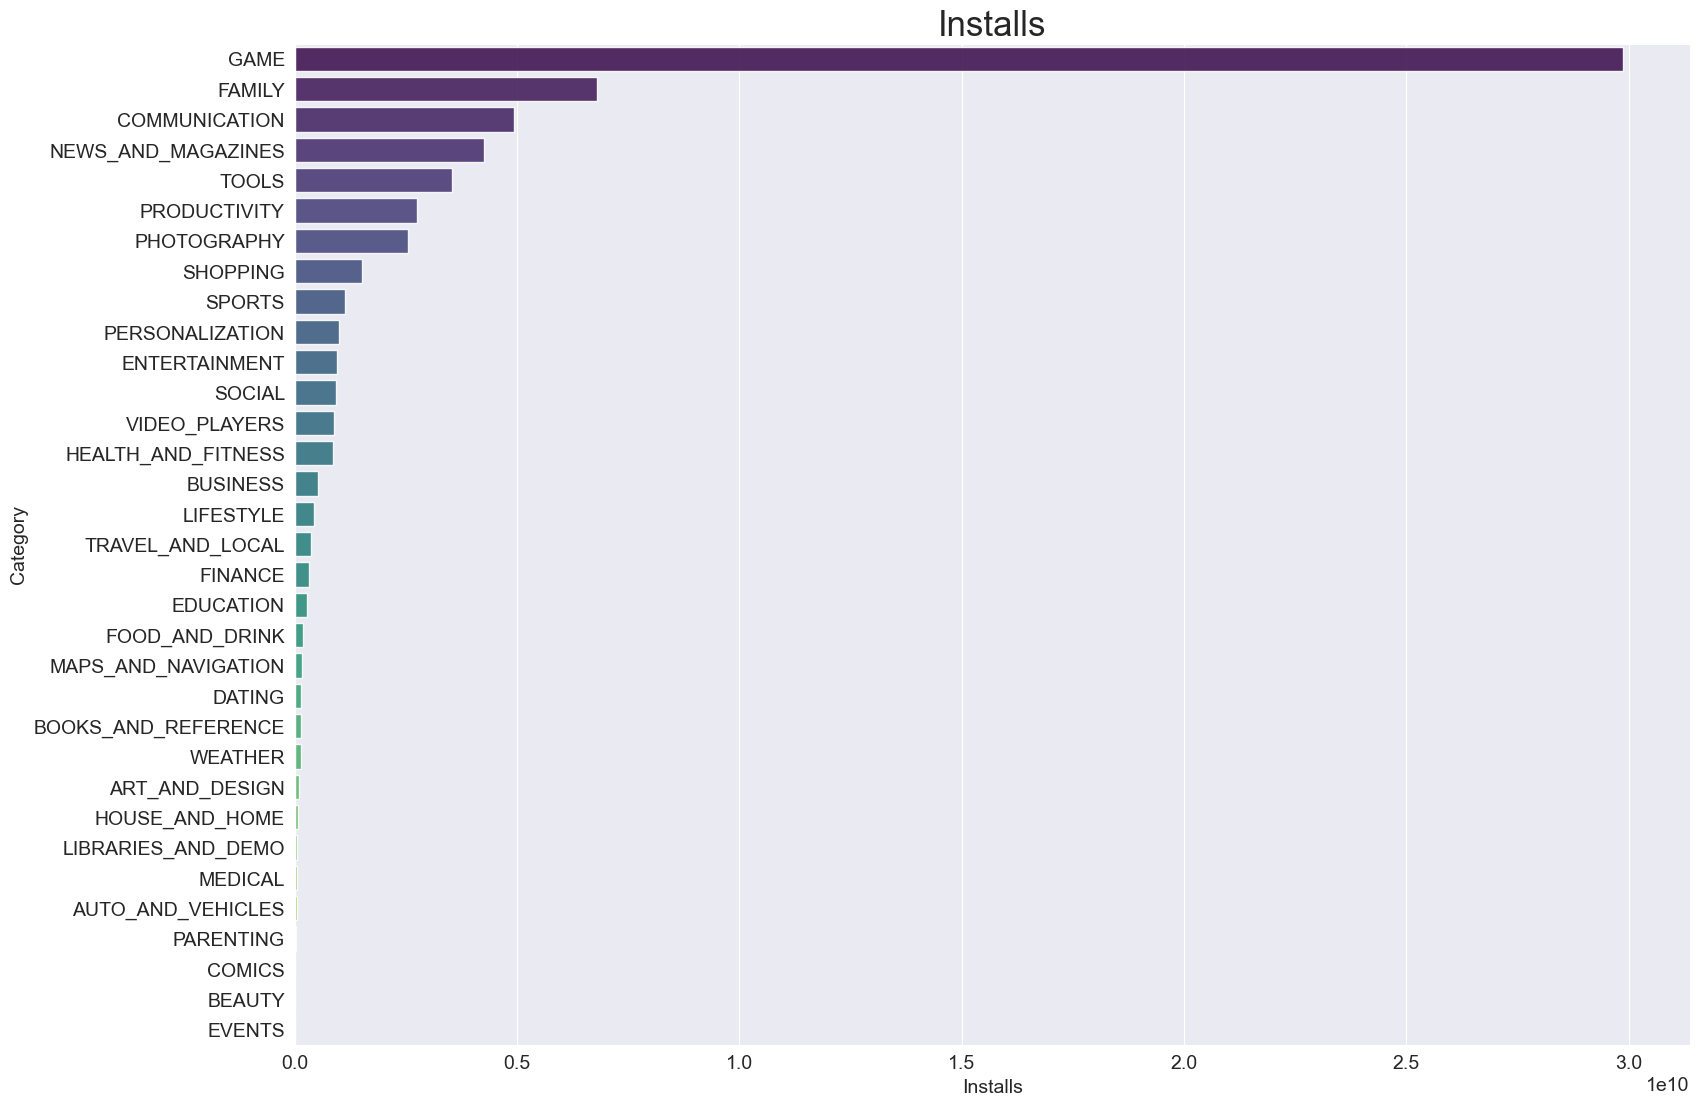

In [44]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

In [ ]:
#Top 3 apps on playstore

In [45]:
def findtop3incategory(str):
    str = str.upper()
    top3 = googlestore_df[googlestore_df['Category'] == str]
    top3apps = top3.sort_values(by='Installs', ascending=False).head(3)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 3 Installed Apps',size = 20);    
    graph = sns.barplot(x = top3apps.App, y = top3apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right');

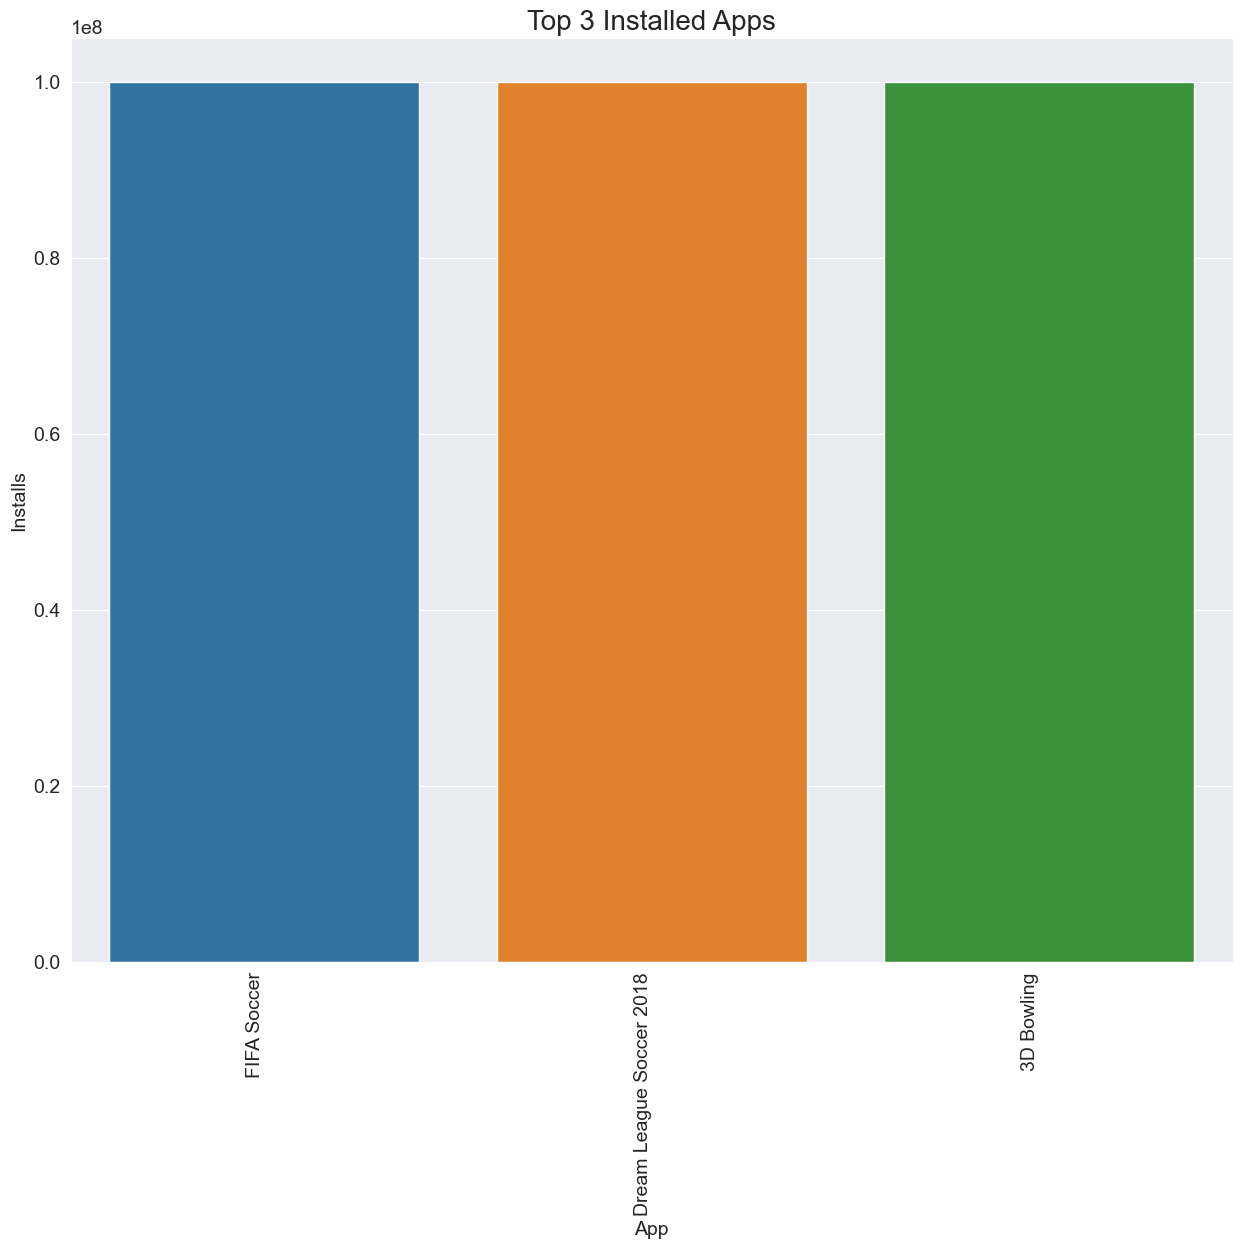

In [46]:
findtop3incategory('Sports')

In [ ]:
# Apps with the highest number of reviews

In [48]:
Apps_with_Highest_rev = googlestore_df.sort_values(by='Reviews', ascending=False).head(20)

In [49]:
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10,Arcade


In [ ]:
# Highest earning app

In [56]:
Paid_Apps_df = googlestore_df[googlestore_df['Type'] == 'Paid']

In [57]:

earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]

In [58]:
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];


In [59]:

earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)

In [60]:
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

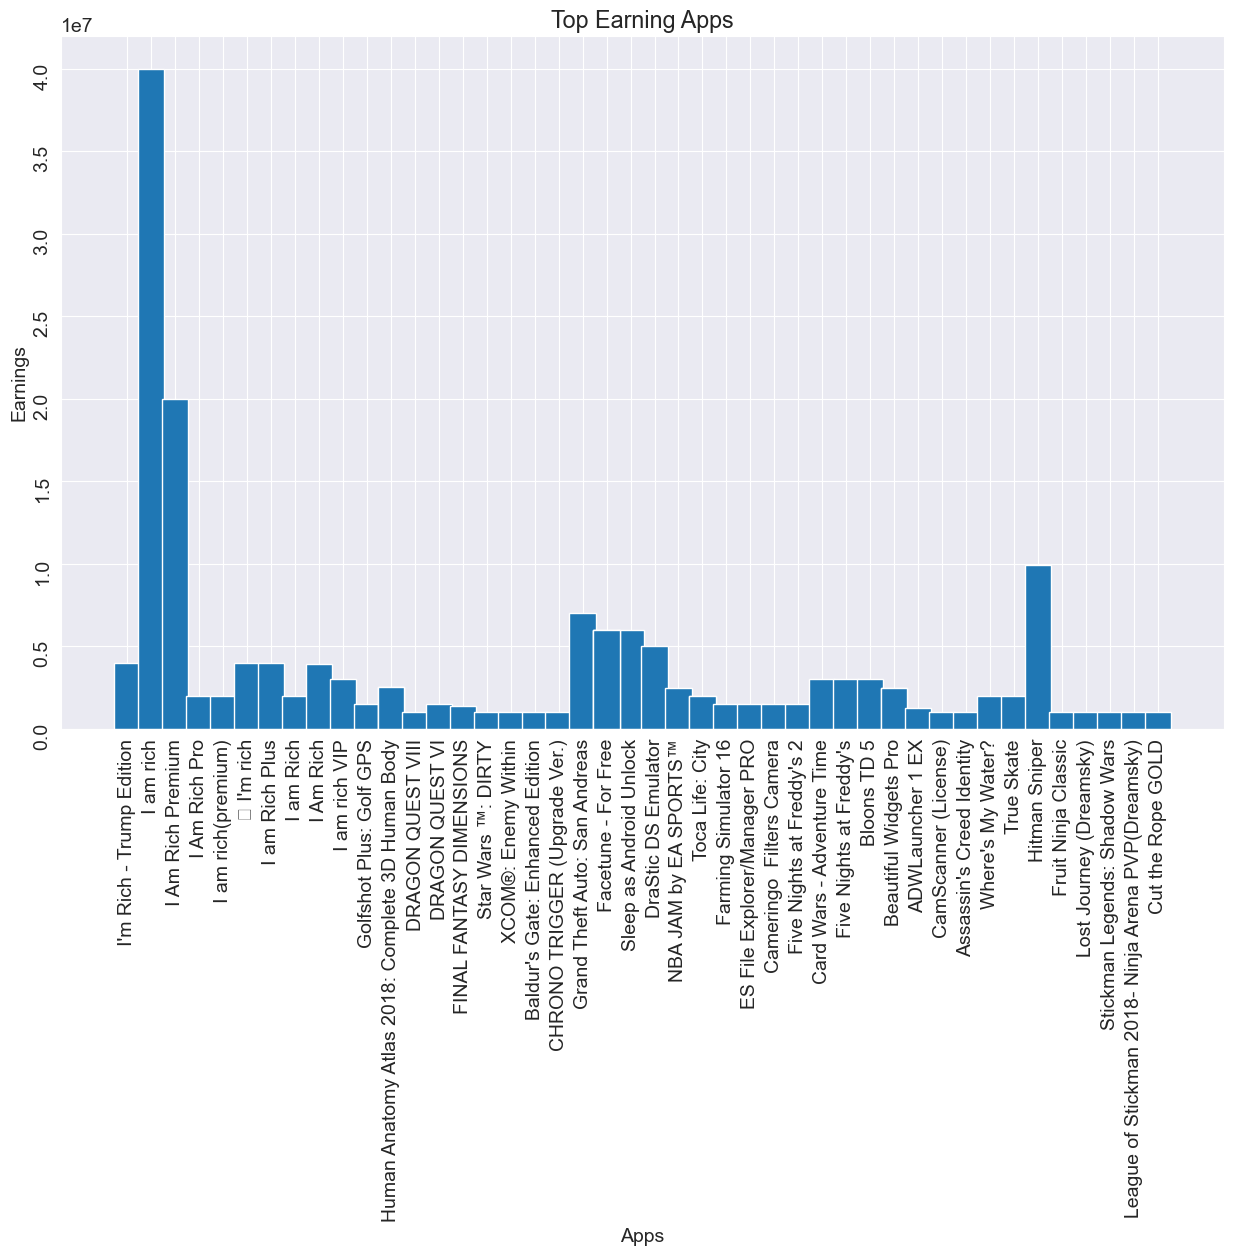

In [61]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");